# Step 4: Fit density profiles to NFW relation

In [1]:
import SciServer.CasJobs as cj
import pandas
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import math

# load library for fitting
from scipy.optimize import curve_fit

In [2]:
# this code is here to adjust the root_folder scratch storage to the user
import SciServer.Authentication as auth
USER=auth.getKeystoneUserWithToken(auth.getToken())
root_folder=f'/home/idies/workspace/Temporary/{USER.userName}/scratch/cosmodata/'

In [3]:
# define fitting function from Navarro, Frenk & White 1995
# we will fit log of rdensity profile
def fitFunc(radius, rho0, Rs):
    return np.log(rho0*(1/((radius/Rs)*(1+radius/Rs)**2)))

In [4]:
# define fitting function from Hernquist 1990
# we will fit log of rdensity profile
def hern(radius, M, a):
    return np.log(0.5*M*a/((radius)*(a+radius)**3)/math.pi)

In [5]:
# read profiles form MyDB
sql="SELECT * FROM halo200k_profiles order by haloID, r"
profiles = cj.executeQuery(sql) # default context='MyDB'


In [6]:
import warnings
warnings.filterwarnings('ignore')

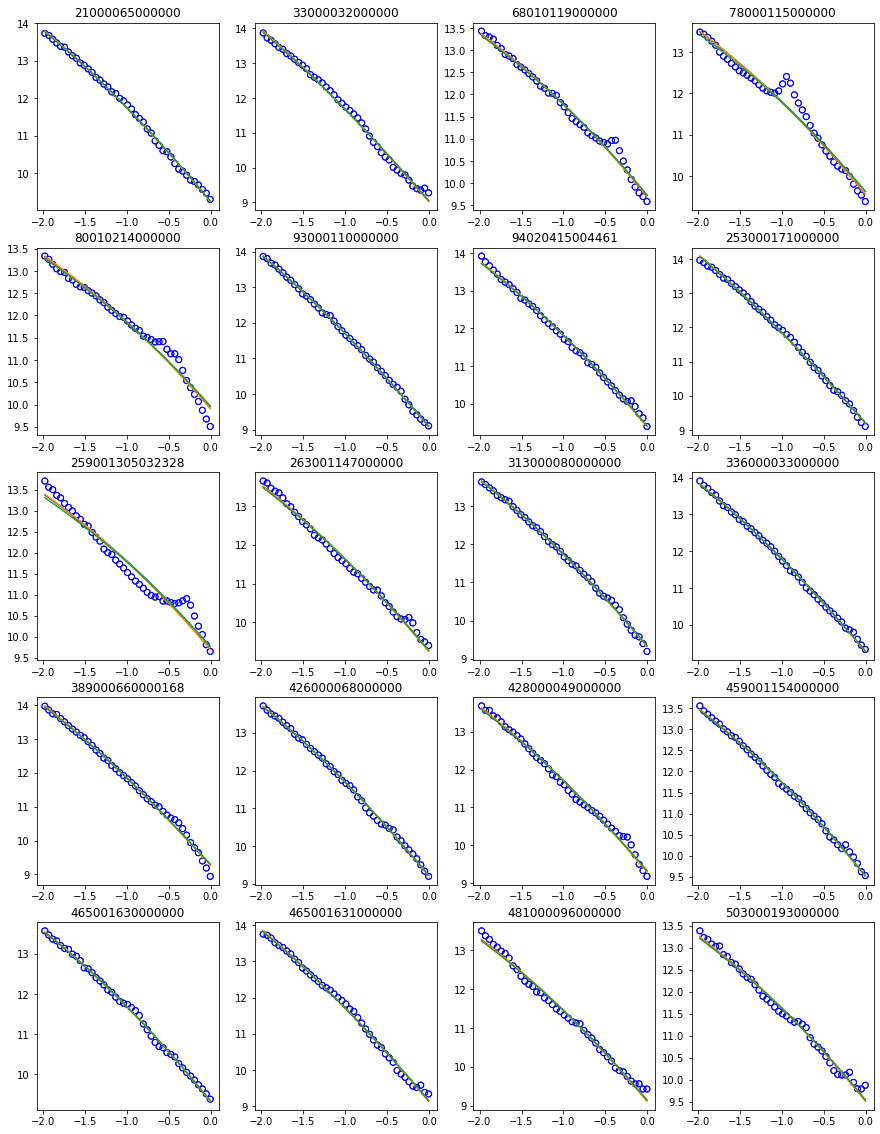

In [7]:
# group profile entries by haloID
halos = profiles.groupby('haloID')
# initialize multi-plot
plt.figure(figsize=(15, 20))
subPlotNum = 1
# loop over halo profile groups
for haloID, profile in halos:
    # filter on maximum value for radius
    df = profile[profile.r < 1]
    r=df['r']
    lr=np.log(r)
    ld=np.log(df['d'])

# perform the fit
    fitParams, fitCovariances = curve_fit(fitFunc, r,ld, p0 = [10000000.0, 0.05])

# plot density profiles as open dots and fit +/- 1 sigma as lines     
    plt.subplot(5,4,subPlotNum)
    subPlotNum += 1
    plt.scatter(lr, ld,facecolors='none', edgecolors='b')
    plt.plot(lr, (fitFunc(r, fitParams[0], fitParams[1])),
             lr, (fitFunc(r, fitParams[0] + np.sqrt(fitCovariances[0,0]), fitParams[1]- np.sqrt(fitCovariances[1,1]))),
             lr, (fitFunc(r, fitParams[0] - np.sqrt(fitCovariances[0,0]), fitParams[1] + np.sqrt(fitCovariances[1,1]))))
    plt.title(str(haloID))
#  make sure file does not yet exist
plotfile = f"{root_folder}densityfits.png"
pl.savefig(plotfile)

#plt.show()

**GOTO Files, see plot has been written**

## TODO some bad fits, look at points
e.g. haloID = 78000115000000